<a href="https://colab.research.google.com/github/AntonioSanabria26/FisicaComputacional1/blob/master/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EVALUACION 2. JOSE ANTONIO SANABRIA VAZQUEZ**

#**BIBLIOTECAS UTILIZADAS**

In [119]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt
import math as math



%matplotlib inline

#**SEGUNDA EVALUACIÓN FÍSICA COMPUTACIONAL 1**

Se pide resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate.

La ecuación diferencial del oscilador amortiguado es

$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = \frac{1}{m } F_0 \sin(\omega t) 
\end{equation*}$$
donde $\omega_n$ es la frecuencia angular natural del oscilador de masa $m$ y constante $k$ del resorte dado por la relación

$$\begin{equation*}
\omega_n = \sqrt{\frac{k}{m}}
\end{equation*}$$
y $\zeta$ es la tasa de amortiguamiento dado por la expresión

$$\begin{equation*}
\zeta = \frac{c}{2 \sqrt{mk}}
\end{equation*}$$
siendo $c$ un coeficiente de viscosidad por el movimiento del oscilador a través del aire.

El lado derecho de la ecuación diferencial, es un término de forzamiento tipo sinoidal de amplitud $F_0$ y frecuencia de forzamiento $\omega$ ($\omega \neq \omega_n$).

El valor del coeficiente $\zeta$, determinará el tipo de movimiento del oscilador:

- Movimiento sobreamortiguado ($\zeta > 1$). El sistema decae exponencialmente al estado estacionario sin oscilar.
- Críticamente amortiguado ($\zeta = 1$).
- Movimiento subamortiguado ($\zeta < 1$). Movimiento periódico que decae exponencialmente.
- Movimiento sin amortiguamiento ($\zeta = 0$). Movimiento periódico regular.

Entonces la funcion definida será

#**Problema 1**

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

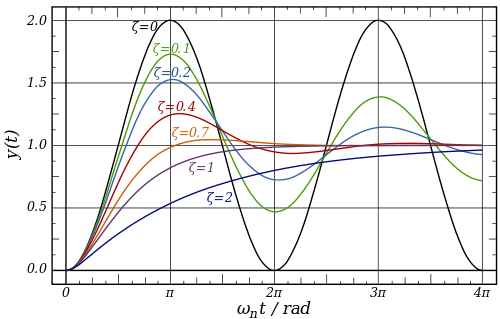


Como vemos podemos separar la ED de segundo grado, en 2 de primer grado para asi poder resolver con mayor facilidad

En primera la ED como vemos $ F_0 = 0 $, por lo que se convierte en una ED Homogenea \\


$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$

Separando como antes mencionamos quedaria

$$\begin{equation*}
\frac{d x}{d t} = v\\
\frac{d v}{d t} = - 2 \zeta \omega_n v-\omega_n^2 x 
\end{equation*}$$







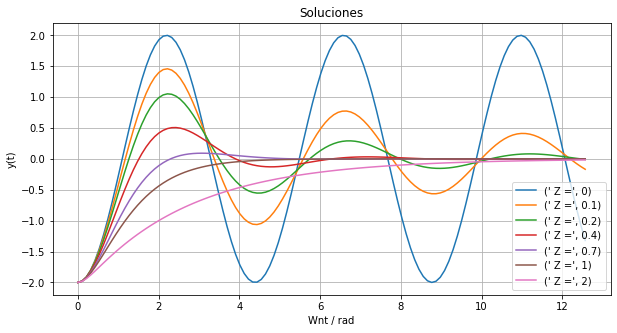

In [177]:
# SOLUCION DE LA ECUACION DIFERENCIAL 1

# DEFINIMOS LOS VALORES INICIALES PARA RESOLVER LA ECUACIÓN

M = 1             # TASA DE AMORTIGUAMIENTO
K = 9             # FRECUENCIA ANGULAR NATURAL
c = 0.0000174     # COEFICIENTE DE VISCOCIDAD

Wn = sqrt(K/M)
Z = sqrt(  ( c )  / ( 2*sqrt(M*K) )  )

abserr = 1.0e-8
relerr = 1.0e-6

# DEFINIMOS UN VECTOR X: X[0]= x , X[1]= v

def dX_dt(X, t=1):
    return np.array([ X[1] , - 2*Z*Wn*X[1] - (Wn**2)*X[0]])

# PUNTOS CRITICOS DEL SISTEMA
X_f0 = np.array([     0. ,     0.])
all(dX_dt(X_f0) == np.zeros(2) )

# SOLUCION NUMERICA PARA EL PROBLEMA

t = np.linspace( 0, 4*np.pi, 120 )
A = (Wn * t)/(2*np.pi)
X0 = np.array([-2, 0])                     # Condiciones iniciales
plt.figure(figsize=(10, 5));

for Z in [0 , 0.1, 0.2, 0.4, 0.7, 1, 2]:

  X, infodict = integrate.odeint(dX_dt, X0, A, full_output=True
                                 , atol=abserr, rtol=relerr)
  x, y = X.T 
  plt.plot(t, x, label=(" Z =", Z));


plt.grid();
plt.legend(loc='best');
plt.xlabel('Wnt / rad');
plt.ylabel('y(t)');
plt.title('Soluciones');
plt.show();


# **Problema 2**

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

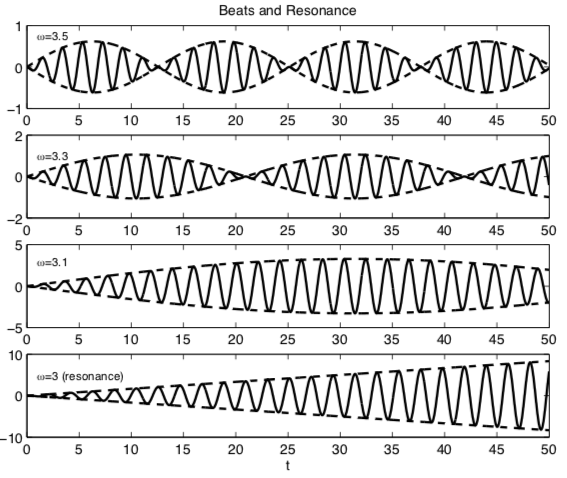


Como vemos podemos separar la ED de segundo grado, en 2 de primer grado para asi poder resolver con mayor facilidad

En primera la ED como vemos $ F_0 = 0 $, por lo que se convierte en una ED Homogenea \\


$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$

Separando como antes mencionamos quedaria

$$\begin{equation*}
\frac{d x}{d t} = v \\
\frac{d v}{d t} =\frac{1}{m } F_0 \sin(\omega t)  - \omega_n^2 x 
\end{equation*}$$


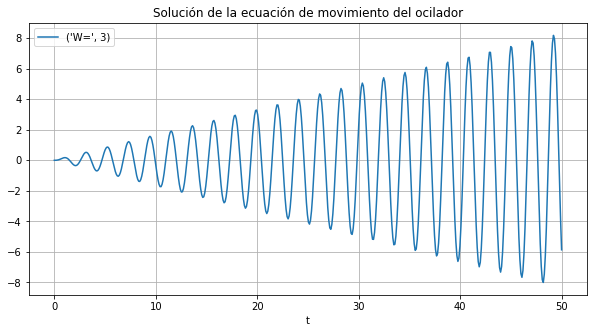

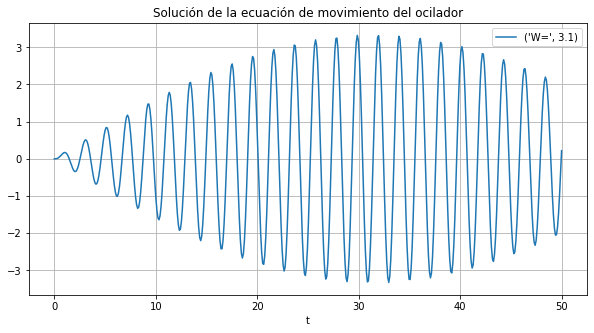

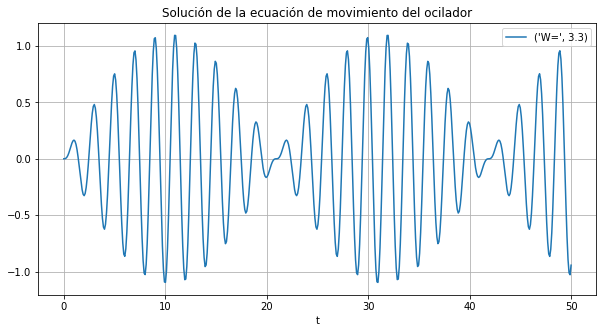

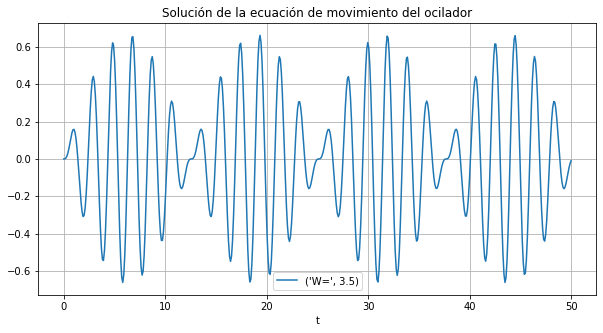

In [174]:
# SOLUCION DE LA ECUACION DIFERENCIAL 2

# DEFINIMOS LOS VALORES INICIALES PARA RESOLVER LA ECUACIÓN

F0 = 1            # FORZAMIENTO TIPO SINOIDAL
M = 1             # TASA DE AMORTIGUAMIENTO
K = 9             # FRECUENCIA ANGULAR NATURAL
c = 0.0000174     # COEFICIENTE DE VISCOCIDAD

Wn = sqrt(K/M)
t = np.linspace( 0, 50, 500 )

# SOLUCION NUMERICA PARA EL PROBLEMA
X0 = np.array([0, 0])                     # Condiciones iniciales

for W in [3, 3.1, 3.3, 3.5]:

# DEFINIMOS UN VECTOR X: X[0]= x , X[1]= v

  def dX_dt(X, t=1):
      return np.array([ X[1] , (1/M)*F0*math.sin(W*t) - (Wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
  x, y = X.T

  plt.figure(figsize=(10,5))
  print()
  plt.plot( t, x , label=('W=', W))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()

# **Problema 3**

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

Como vemos podemos separar la ED de segundo grado, en 2 de primer grado para asi poder resolver con mayor facilidad

En primera la ED como vemos $ F_0 = 0 $, por lo que se convierte en una ED Homogenea \\


$$\begin{equation*}
\frac{d^2 x}{d t^2} + 2 \zeta \omega_n \frac{dx}{dt}+\omega_n^2 x = 0
\end{equation*}$$

Separando como antes mencionamos quedaria

$$\begin{equation*}
\frac{d x}{d t} = v \\
\frac{d^2 x}{d t^2} = \frac{1}{m } F_0 \sin(\omega t) - 2 \zeta \omega_n \frac{dx}{dt}-\omega_n^2 x
\end{equation*}$$

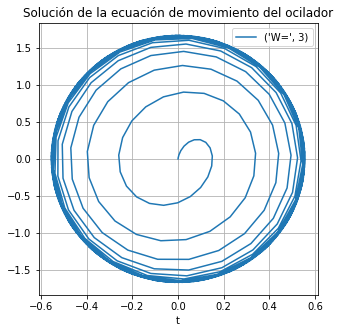

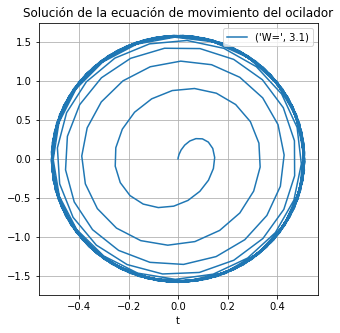

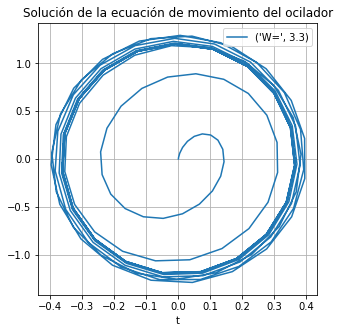

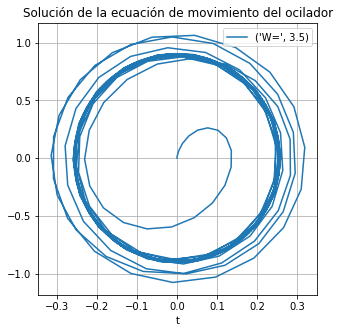

In [176]:
# SOLUCION DE LA ECUACION DIFERENCIAL 3

# DEFINIMOS LOS VALORES INICIALES PARA RESOLVER LA ECUACIÓN


F0 = 1            # FORZAMIENTO TIPO SINOIDAL
M = 1             # TASA DE AMORTIGUAMIENTO
K = 9             # FRECUENCIA ANGULAR NATURAL
c = 0.0000174     # COEFICIENTE DE VISCOCIDAD
Z = 0.1           # COEFICIENTE DE AMORTIGUAMIENTO

Wn = sqrt(K/M)

abserr = 1.0e-8
relerr = 1.0e-6

# PUNTOS CRITICOS DEL SISTEMA
X_f0 = np.array([     0. ,     0.])
all(dX_dt(X_f0) == np.zeros(2) )

# SOLUCION NUMERICA PARA EL PROBLEMA
X0 = np.array([0, 0])                     # Condiciones iniciales


for W in [3,3.1,3.3,3.5]:

# DEFINIMOS UN VECTOR X: X[0]= x , X[1]= v

  def dX_dt(X, t=1):
      return np.array([ X[1] , (1/M)*F0*math.sin(W*t) - 2*Z*Wn*X[1] - (Wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
  x, y = X.T

  plt.figure(figsize=(5,5))
  print()
  plt.plot( x, y , label=('W=', W))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()